## Chargement du modele

In [1]:
from tkinter import *
from PIL import Image, ImageDraw
from matplotlib.pyplot import imshow
import numpy as np
from keras.models import load_model

Using TensorFlow backend.


In [2]:
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# num_filters = 8
# filter_size = 3
# pool_size = 2

# model = Sequential([
#   Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
#   MaxPooling2D(pool_size=pool_size),
#   Flatten(),
#   Dense(26, activation='softmax')
# ])

# model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('1000_CNN.h5')

(28, 28) 

C'est un  Q
(28, 28) 

C'est un  W
(28, 28) 

C'est un  M
(28, 28) 

C'est un  W
(28, 28) 

C'est un  H
(28, 28) 

C'est un  B
(28, 28) 

C'est un  R
(28, 28) 

C'est un  B
(28, 28) 

C'est un  W
(28, 28) 

C'est un  B


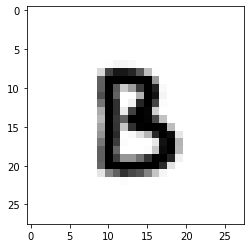

In [24]:
class App:

    def __init__(self, master, size=280):
        self.size = size
        self.model = load_model('1000_CNN.h5')

        master.title("OCR application")
        master.resizable(False, False)
        
        # Create top canvas and image
        self.cv = Canvas(master, width=size, height=size, bg='white')
        self.cv.pack()

        # self.image1 = Image.new("RGB", (size, size), (255,255,255))
        self.image1 = Image.new("L", (self.size, self.size), 'black' )
        self.draw = ImageDraw.Draw(self.image1)

        self.cv.bind("<B1-Motion>", lambda e: self.paint(e.x,e.y))

        # Create bottom label and buttons
        frame = Frame(master)
        frame.pack(side=BOTTOM, fill=BOTH, expand=True)
        
        reslabel = Label(frame, text = "Dessine une lettre")
        reslabel.pack(side=LEFT, fill=Y, expand=True, pady=10)
        
        button = Button(frame, text="Evaluer", command=self.evaluate, width=6)
        button.pack(side=LEFT, fill=Y)

        button = Button(frame, text="Effacer", command=self.clear, width=6)
        button.pack(side=RIGHT, fill=Y)

    def evaluate(self):
        # img = self.image1.resize((28, 28)).convert('L') # image RGB
        img = self.image1.resize((28, 28))
        image_test = np.array(img)
        imshow(image_test, cmap='Greys')

        alphabet = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

        image_test = np.expand_dims(image_test, axis=(0,-1))
        prediction = np.argmax(self.model.predict(image_test) , axis=1)[0]
        lettre = alphabet[prediction]

        print(
            "C'est un ", lettre
        )

    def paint(self, x, y):
        t = 11

        x1, y1 = (x - t), (y - t)
        x2, y2 = (x + t), (y + t)
        self.cv.create_oval(x1, y1, x2, y2, fill='black', width=4)
        self.draw.ellipse([x1, y1, x2, y2], fill='white')

    def clear(self):
        self.image1 = Image.new("L", (self.size, self.size), 'black' )
        self.draw = ImageDraw.Draw(self.image1)

        # self.image1 = Image.new("L", (self.size, self.size))
        self.cv.delete("all")
    
master = Tk()
app = App(master)
master.mainloop()


In [5]:
def drawing_test (model):

    model = load_model(model)

def evaluate():
    img = image1.resize((28, 28)).convert('L')
    pixels = img.load()
    for i in range(img.size[0]):
        for j in range(img.size[1]):
            pixels[i,j] = 255 if pixels[i,j] == 0 else 0
    X_test = np.array(img).reshape(1, 28, 28, 1)
    predicted_classes = model.predict_classes(X_test, verbose=0)
    reslabel['text'] = "Prédiction : " + str(fct.alphabet[predicted_classes[0]])

def clear():
    pixels = image1.load()
    for i in range(image1.size[0]):
        for j in range(image1.size[1]):
            pixels[i,j] = (255, 255,255)
    cv.delete("all")
    reslabel['text'] = "Dessine une lettre"

def paint(event):
    x1, y1 = (event.x - 10), (event.y - 10)
    x2, y2 = (event.x + 10), (event.y + 10)
    cv.create_oval(x1, y1, x2, y2, fill="black",width=4)
    draw.ellipse([x1, y1, x2, y2],fill="black")

root = tk.Tk()
root.title("OCR application")
root.resizable(False, False)

# Create top canvas and image
cv = tk.Canvas(root, width=280, height=280, bg='white')
cv.pack()
image1 = Image.new("RGB", (280, 280), (255, 255, 255))
draw = ImageDraw.Draw(image1)
cv.bind("<B1-Motion>", paint)

# Create bottom label and buttons
bottom = tk.Frame(root)
bottom.pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)
reslabel = tk.Label(text = "Dessine une lettre")
reslabel.pack(in_=bottom, side=tk.LEFT, fill=tk.Y, expand=True)
button = tk.Button(text="Evaluer", command=evaluate, width=6)
button.pack(in_=bottom, side=tk.LEFT, fill=tk.Y)
button = tk.Button(text="Effacer", command=clear, width=6)
button.pack(in_=bottom, side=tk.RIGHT, fill=tk.Y)

root.mainloop()

NameError: name 'paint' is not defined

In [ ]:
class App:
    def __init__(self, master, size=28):
        self.canvas = Canvas(master, width=size, height=size, bg='white')
        self.canvas.bind('<B1-Motion>', lambda e: self.paint(e.x,e.y))
        self.button = Button(master, text="Generer image", command=self.generer_image)
        self.canvas.pack(expand=YES)
        self.button.pack(pady=10)

    def paint(self, x, y):
        color='black'
        x1, y1 = x-1, y-1
        x2, y2 = x+1, y+1
        self.canvas.create_oval(x1,y1,x2,y2,fill=color,outline=color)

    def generer_image(self):
        file = 'lettre'

        self.canvas.postscript(colormode='color', file=file + '.ps')
        img = Image.open(file + '.ps').convert('LA')
        img_array = np.asarray(img)
        print( img_array.shape, img_array[0] )
        imshow(img_array, cmap='Greys')
        img.save(file + '.png', format='PNG')

def getter(widget):
    x=root.winfo_rootx()+widget.winfo_x()
    y=root.winfo_rooty()+widget.winfo_y()
    x1=x+widget.winfo_width()
    y1=y+widget.winfo_height()
    ImageGrab.grab().crop((x,y,x1,y1)).save("file path here")

In [ ]:
master = Tk()
master.title('Dessine une lettre')
app = App(master)

master.mainloop()
